MAIN IMPORTS

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
import pickle

PRELIMINARY

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

#Sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

#Smoker
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#Region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


STATISTCAL DATA

In [8]:
#Showing correlation between variables and insurance charg
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

VARIABLE-SPECIFIC GRAPHS

In [9]:
#Showing charge distribution for smokers vs. non-smokers
#f = pl.figure(figsize=(12,5))

#ax = f.add_subplot(121)
#sns.distplot(data[(data.smoker == 1)]['charges']['smoke'], color='c', ax=ax)
#ax.set_title('Distribution of Smokers')

#ax = f.add_subplot(122)
#sns.distplot(data[(data.smoker == 0)]['charges'], color='b', ax=ax)
#ax.set_title('Distribution of Non-Smokers')

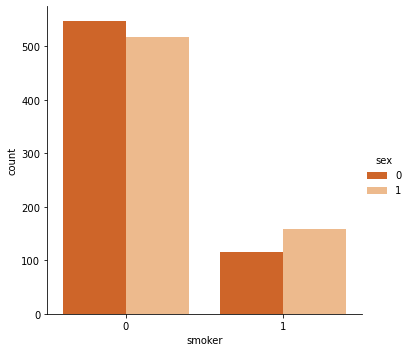

In [10]:
#Bar graoh showing distribution of smokers. 1 - Women; 0 - Men
sns.catplot(x="smoker", kind="count", hue='sex', palette="Oranges_r", data=data)

In [11]:
#Showing charge distribution for smokers and non smokers
#sns.plmplot(x="age", y="charges", hue="smoker", data=data, palette='Oranges_r', size=7)
#ax.set_title('Smokers and Non-Smokers')

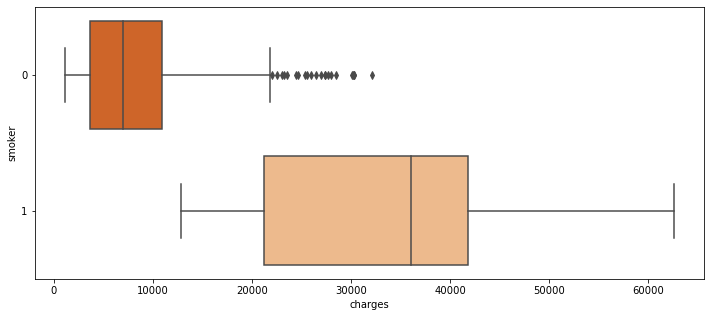

In [12]:
#Box plot for insurance charges for women (smoker vs. non-smoker)
pl.figure(figsize=(12,5))
#pl.title("Box Plot for Charges of Women (Smoker vs. Non-Smoker")
sns.boxplot(y="smoker", x="charges", data=data[(data.sex == 1)], orient="h", palette='Oranges_r')

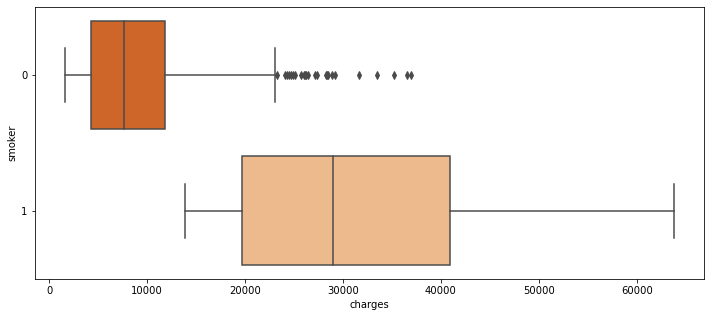

In [13]:
#Box plot for insurance charges for men (smoker vs. non-smoker)
pl.figure(figsize=(12,5))
#pl.title("Box Plot for Charges of Men (Smoker vs. Non-Smoker)")
sns.boxplot(y="smoker", x="charges", data=data[(data.sex == 0)], orient="h", palette='Oranges_r')

In [14]:
#Showing the distribution of BMIs
#pl.figure(figsize=(12,5))
#pl.title("Distribution of BMI")
#ax = sns.distplot(data["bmi"], color='m')

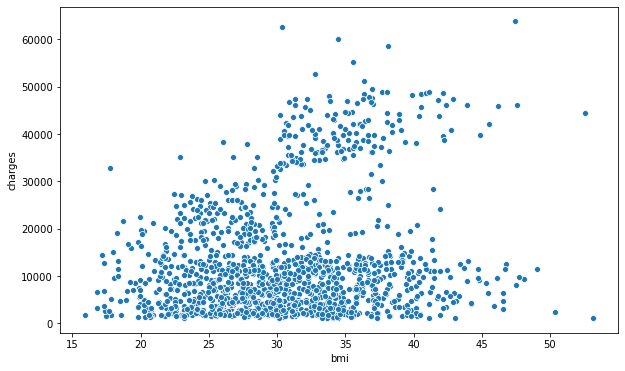

In [15]:
#Scatter plot showing distribution of charges for various BMIs
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges', data=data, palette='Oranges')
#ax.set_title('Scatter Plot of Charges and BMI')

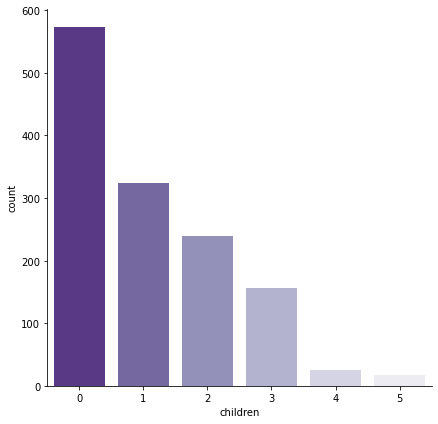

In [16]:
sns.catplot(x="children", kind="count", palette="Purples_r", data=data, size=6)

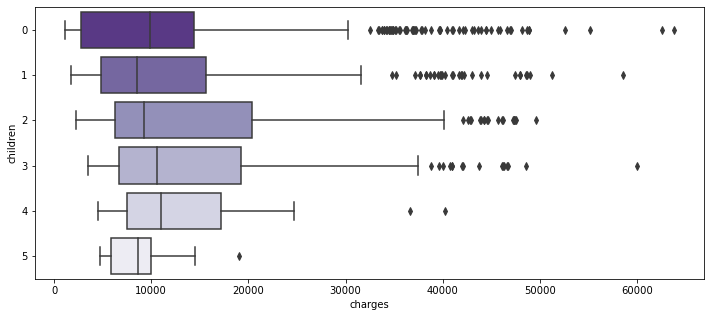

In [17]:
#Box plot of medical charges per number of children
pl.figure(figsize=(12,5))
#pl.title("Box Plot for Medical Charges Per # of Children")
sns.boxplot(y="children", x="charges", data=data, orient="h", palette='Purples_r')

IMPORTS

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

LINEAR REGRESSION

In [19]:
x = data.drop(['charges'], axis=1)
y = data.charges

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train,y_train)

In [21]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [22]:
print("Linear Regression Score:", lr.score(x_test, y_test))
print("Linear Regression Score:", lr.score(x_train, y_train))

Linear Regression Score: 0.7962732059725786


RIDGE REGRESSION

In [23]:
from sklearn.linear_model import Ridge

In [24]:
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [25]:
#print(Ridge.intercept_)
#print(Ridge.coef_)
print("Ridge Regression Score:", Ridge.score(x_test, y_test))
print("Ridge Regression Score:", Ridge.score(x_tain, y_train))

Ridge Regression Score: 0.7961319557404141


LASSO REGRESSION

In [26]:
from sklearn.linear_model import Lasso

In [27]:
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [28]:
Lasso.fit(x_train, y_train)

Lasso(alpha=0.2)

In [29]:
#print(Lasso.intercept_)
#print(Lasso.coef_)
print("Lasso Regression Score:", Lasso.score(x_test, y_test))
print("Lasso Regression Score:", Lasso.score(x_train, y_train))

Lasso Regression Score: 0.7962717675131828


POLYNOMIAL REGRESSION

In [30]:
X = data.drop(['charges'], axis = 1)
Y = data.charges

In [31]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state = 0)

In [33]:
plr = LinearRegression().fit(X_train, Y_train)

In [34]:
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

In [35]:
print("Polynomial Regression Score:", plr.score(X_test, Y_test))

Polynomial Regression Score: 0.8846283666147687


In [ ]:
print("Polynomial Regression Score:", plr.score(X_train, Y_train))

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(df)

           Actual     Predicted
578    9724.53000  10947.914015
610    8547.69130   9764.827331
569   45702.02235  38027.186254
1034  12950.07120  16076.266564
198    9644.25250   7003.050939
...           ...           ...
574   13224.05705  14993.031723
1174   4433.91590   6934.890107
1327   9377.90470  10983.730535
817    3597.59600   6810.504924
1337  29141.36030  36668.701168

[335 rows x 2 columns]


RANDOM FOREST REGRESSION

In [37]:
forest = RandomForestRegressor(n_estimators = 100,
                               criterion = 'mse',
                               random_state = 1,
                               n_jobs = -1)

In [38]:
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

In [39]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train, forest_train_pred),
mean_squared_error(y_test, forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142


In [40]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train, forest_train_pred),
r2_score(y_test, forest_test_pred)))

R2 train data: 0.974, R2 test data: 0.873


In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(df)

           Actual     Predicted
578    9724.53000  10947.914015
610    8547.69130   9764.827331
569   45702.02235  38027.186254
1034  12950.07120  16076.266564
198    9644.25250   7003.050939
...           ...           ...
574   13224.05705  14993.031723
1174   4433.91590   6934.890107
1327   9377.90470  10983.730535
817    3597.59600   6810.504924
1337  29141.36030  36668.701168

[335 rows x 2 columns]


In [42]:
print("Random Forest Regression Score:", forest.score(x_test, y_test))

Random Forest Regression Score: 0.8733833973969799


In [43]:
print("Random Forest Regression Score:", forest.score(x_train, y_train))

Random Forest Regression Score: 0.9739029579254488


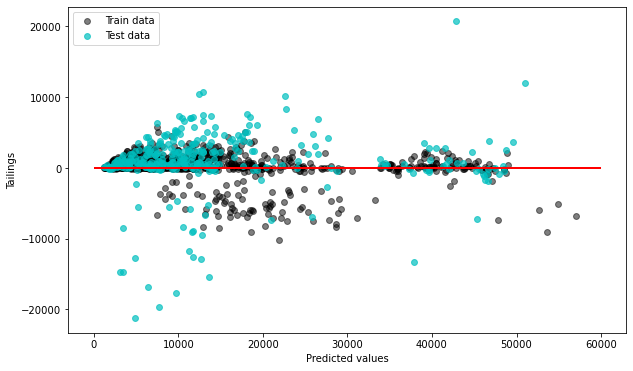

In [44]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()